In [2]:
# importing data modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as py
import seaborn as sns

In [3]:
# set the style for seaborn
sns.set(style="whitegrid")

In [4]:
# loading csv file 
# adding sep -> separates the data and adds space between rows and column
df = py.read_csv(r"../Sales-Story/sales_data_storytelling.csv", sep=';')

In [5]:
# checking file contents and displaying file contents
print(df.head())

        Month    Product  UnitsSold  Revenue
0  2023/01/01  Notebooks         50  2346.79
1  2023/01/01       Pens         55  4987.65
2  2023/01/01    Markers         25  2290.35
3  2023/01/01    Folders         94  4394.78
4  2023/01/01   Staplers        153  4887.80


In [6]:
# converting Month column to datetime for better handling
df['Month'] = py.to_datetime(df['Month'])

# group the data by month to calculate total revenue
month_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

# displaying month revenue results
print(month_revenue)

        Month   Revenue
0  2023-01-01  18907.37
1  2023-02-01  11553.30
2  2023-03-01  10426.56
3  2023-04-01   8782.97
4  2023-05-01  13220.06
5  2023-06-01  13732.25
6  2023-07-01  19947.59
7  2023-08-01   9842.48
8  2023-09-01  15001.41
9  2023-10-01  16074.78
10 2023-11-01  19136.66
11 2023-12-01  11193.40


In [7]:
# group data by month to calculate total units
month_units = df.groupby('Month')['UnitsSold'].sum().reset_index()

# displaying month units result
print(month_units)

        Month  UnitsSold
0  2023-01-01        377
1  2023-02-01        517
2  2023-03-01        477
3  2023-04-01        418
4  2023-05-01        716
5  2023-06-01        767
6  2023-07-01        283
7  2023-08-01        387
8  2023-09-01        658
9  2023-10-01        785
10 2023-11-01        491
11 2023-12-01        533


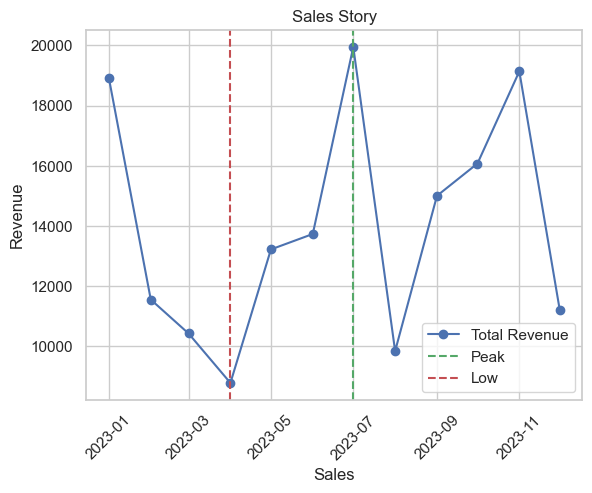

In [8]:
# plot a trend using matplotlib library 
# to plot a trend two variables required (x,y) 
# x is the time
# y is the actual data

# converting the Month column to a datetime object
df['Month'] = py.to_datetime(df['Month'])

# calculating total revenue for all the months
total_month_revenue = df.groupby('Month')['Revenue'].sum()

# finding the peak and low performing months
peak = total_month_revenue.idxmax()
low_peak = total_month_revenue.idxmin()

# configuring the size
plt.Figure(figsize=(20,5))

# plotting the x,y variables data
plt.plot(total_month_revenue.index, total_month_revenue.values, marker = 'o', linestyle='-', color='b', label="Total Revenue")

# plotting trend over time adding labels for peak and low performing months
plt.axvline(peak, color='g', linestyle='--', label="Peak")
plt.axvline(low_peak, color='r', linestyle='--', label="Low")

# title of the graph
plt.title("Sales Story")

# plotting x label
plt.xlabel("Sales")

# plotting y label
plt.ylabel("Revenue")

# 
plt.legend()
plt.xticks(rotation = 45)

# show visual
plt.grid(True)
plt.show()

In [9]:
# identifying peak and low performing in months revenue
peak = month_revenue.loc[month_revenue['Revenue'].idxmax()]
low_peak = month_revenue.loc[month_revenue['Revenue'].idxmin()]

# displaying 
print(f"Peak Month: {peak['Month'].strftime('%B %Y')} with Revenue: {peak['Revenue']}")
print(f"Low Month: {low_peak['Month'].strftime('%B %Y')} with Revenue: {low_peak['Revenue']}")

Peak Month: July 2023 with Revenue: 19947.59
Low Month: April 2023 with Revenue: 8782.97


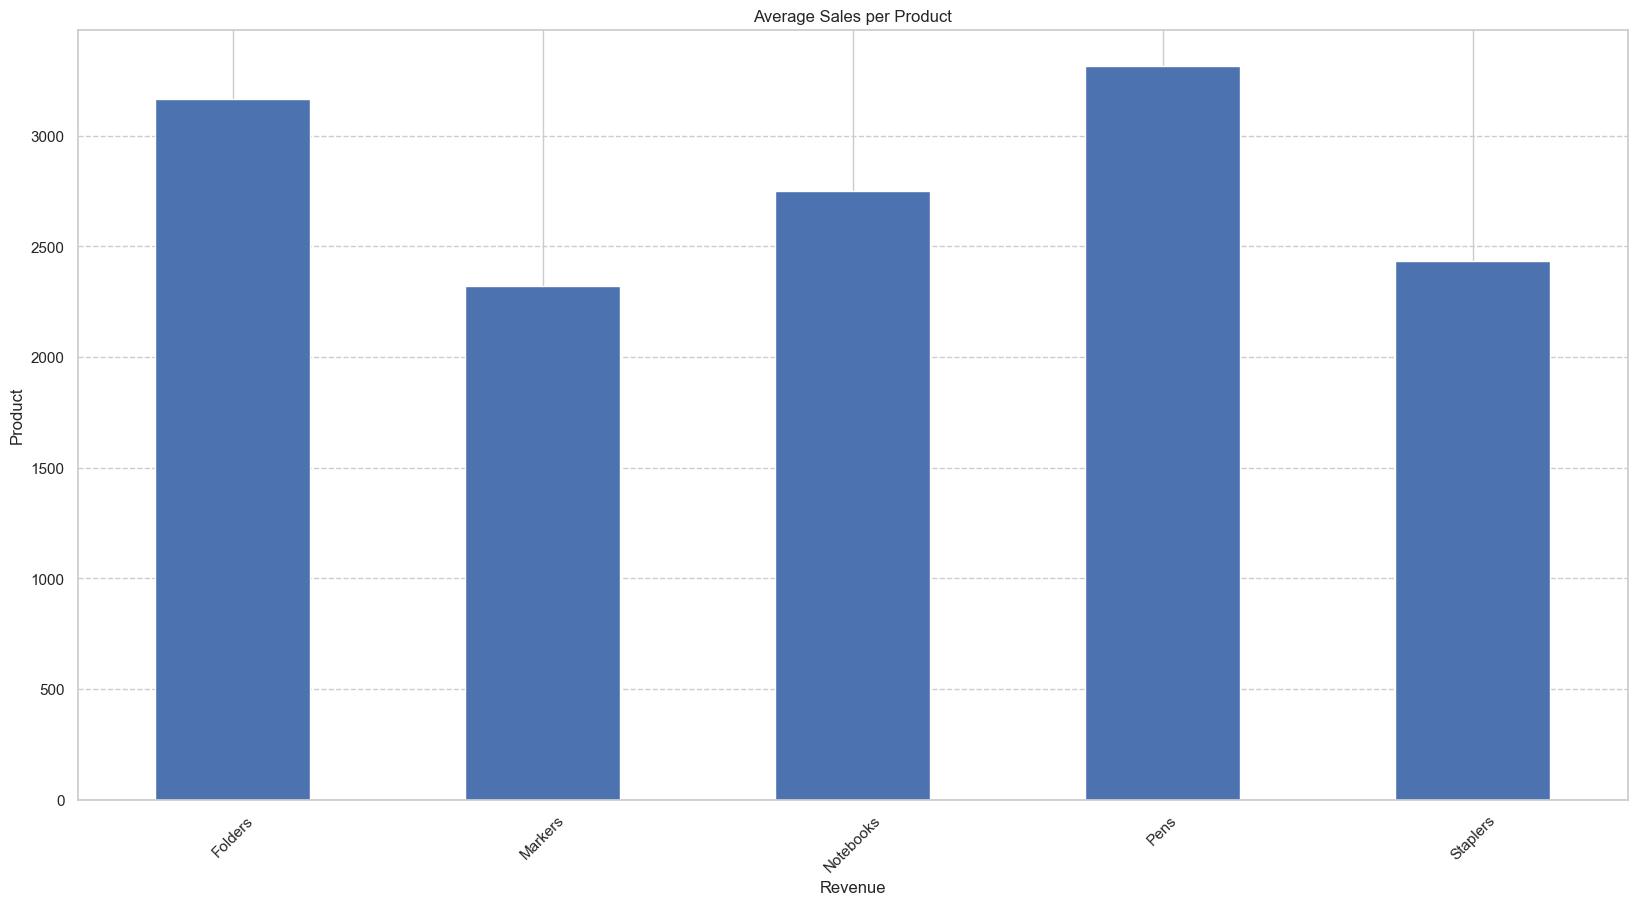

In [11]:
# plotting a bar graph

# bar graph size
plt.figure(figsize=(20,10))

# average of the data
average = df.groupby('Product')['Revenue'].mean()

# bar chart values
average.plot(kind='bar')

# plotting title
plt.title("Average Sales per Product")

# plotting x label
plt.xlabel("Revenue")
plt.xticks(rotation=45)
# plotting y label
plt.ylabel("Product")
plt.grid(axis='y', linestyle="--")
# showing visual
plt.show()

In [12]:
# average of the data
average_per_product = df.groupby('Product')['Revenue'].mean()

# identifying the best selling product
best_selling_product = average_per_product.idxmax()
highest_average_revenue = average_per_product.max() 

# identifying the low selling product
low_selling_product = average_per_product.idxmin()
lowest_average_revenue = average_per_product.min()

# displaying best selling product
print(f"Best Selling Product: {best_selling_product} with Average Revenue of: {highest_average_revenue}")

# displaying low selling product
print(f"Lowest Product: {low_selling_product} with Average Revenue of: {lowest_average_revenue}")



Best Selling Product: Pens with Average Revenue of: 3313.5033333333336
Lowest Product: Markers with Average Revenue of: 2319.985


In [13]:
# calculating the total revenue for each product
total_revenue_per_product = df.groupby("Product")["Revenue"].sum()

# displaying the total revenue for each product
print(f"Total Revenue Per Product:")
print("")
print(total_revenue_per_product)

# calculating total for all product
total_product_sales = total_revenue_per_product.sum()

# displaying the total revenue for all products
print("")
print(f"Total Revenue for All Products: {total_product_sales}")

Total Revenue Per Product:

Product
Folders      38008.79
Markers      27839.82
Notebooks    32984.71
Pens         39762.04
Staplers     29223.47
Name: Revenue, dtype: float64

Total Revenue for All Products: 167818.83000000002


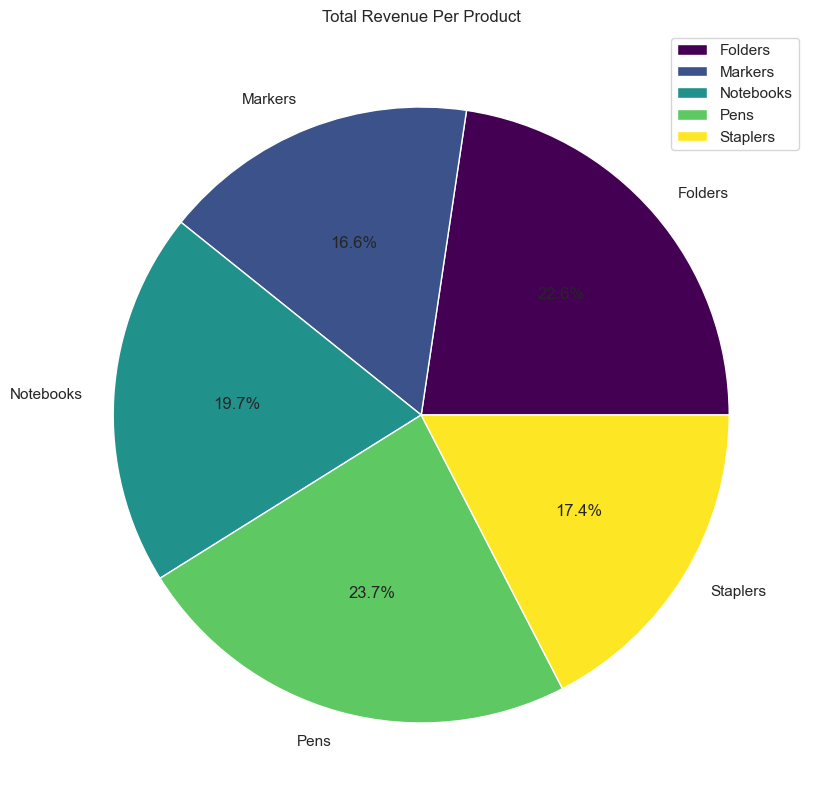

In [28]:
# plotting a pie chart 
# pie chart size
# plotting product revenue into pie chart
total_revenue_per_product.plot(kind='pie', autopct="%1.1f%%", colormap="viridis", figsize=(10,10), legend=True)
plt.title("Total Revenue Per Product")
# remove default y-axis label
plt.ylabel("")
plt.show()